In [6]:
import sys
sys.path.append('../src')

In [9]:
import numpy as np

from liab.scm import ComponentOrEquation, GSym, System
from liab.failure import ClosedHalfSpaceFailureSet
from liab.k_leg_liab import k_leg_liab

a_sp = ComponentOrEquation(['a'], 'A', 'a')
b_sp = ComponentOrEquation(['b'], 'B', 'b')
c_sp = ComponentOrEquation(['c'], 'C', 'c')
d_sp = ComponentOrEquation(['d', 'A', 'B', 'C'], 'D', 'd+Max(A*B,A*C,B*C)')
a_im = ComponentOrEquation(['a'], 'A', 'a+10')
b_im = ComponentOrEquation(['b'], 'B', 'b+10')
c_im = ComponentOrEquation(['c'], 'C', 'c+8')
d_im = ComponentOrEquation(['d', 'A', 'B', 'C'], 'D', 'd+Max(A*B,A*C,B*C)+10')

In [12]:
S = System([a_sp, b_sp, c_sp, d_sp])
T = System([a_im, b_im, c_im, d_im])

print(f'{S=}')
print(f'{T=}')

S=System(cs=[ComponentOrEquation(I=['a'], O=A, f=a), ComponentOrEquation(I=['b'], O=B, f=b), ComponentOrEquation(I=['c'], O=C, f=c), ComponentOrEquation(I=['d', 'A', 'B', 'C'], O=D, f=d+Max(A*B,A*C,B*C))])
T=System(cs=[ComponentOrEquation(I=['a'], O=A, f=a+10), ComponentOrEquation(I=['b'], O=B, f=b+10), ComponentOrEquation(I=['c'], O=C, f=c+8), ComponentOrEquation(I=['d', 'A', 'B', 'C'], O=D, f=d+Max(A*B,A*C,B*C)+10)])


In [13]:
M = S.induced_scm()
N = T.induced_scm(state_order=M.state_order)
print(f'{M=}')
print(f'{N=}')

M=SCM(U={'b', 'd', 'c', 'a'}, V={'A', 'D', 'C', 'B'}, cs={'A': ComponentOrEquation(I=['a'], O=A, f=a), 'B': ComponentOrEquation(I=['b'], O=B, f=b), 'C': ComponentOrEquation(I=['c'], O=C, f=c), 'D': ComponentOrEquation(I=['d', 'A', 'B', 'C'], O=D, f=d+Max(A*B,A*C,B*C))}, state_order=['B', 'C', 'A', 'D'])
N=SCM(U={'b', 'd', 'c', 'a'}, V={'A', 'D', 'C', 'B'}, cs={'A': ComponentOrEquation(I=['a'], O=A, f=a+10), 'B': ComponentOrEquation(I=['b'], O=B, f=b+10), 'C': ComponentOrEquation(I=['c'], O=C, f=c+8), 'D': ComponentOrEquation(I=['d', 'A', 'B', 'C'], O=D, f=d+Max(A*B,A*C,B*C)+10)}, state_order=['B', 'C', 'A', 'D'])


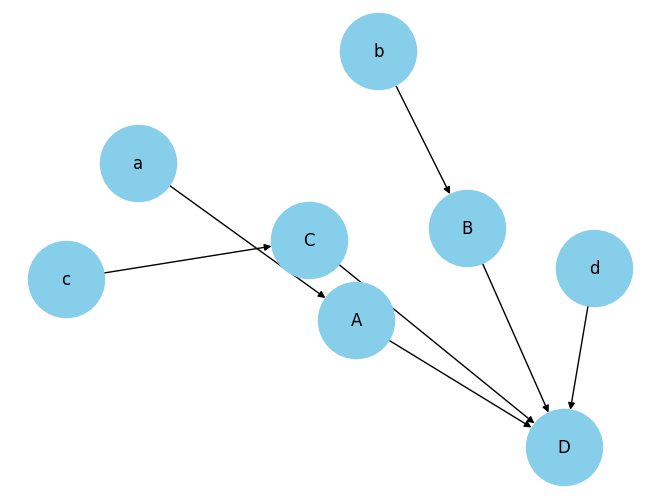

In [14]:
M.draw()

In [15]:
u = {'a': 10, 'b': 10, 'c': 10, 'd': 10}
F = ClosedHalfSpaceFailureSet({'D': (250, 'ge')})

In [22]:
print('Specification state at u=', M.get_state(u)[0])
print('Implementation state at u=', N.get_state(u)[0])

Specification state at u= {'B': 10.0, 'C': 10.0, 'A': 10.0, 'D': 110.0}
Implementation state at u= {'B': 20.0, 'C': 18.0, 'A': 20.0, 'D': 420.0}


In [23]:
for X in S.cs:
    print(f'Implementation/fixed-{X.O} state at u=', 
          T.get_replacement({X.O: X}).induced_scm().get_state(u)[0])

Implementation/fixed-A state at u= {'B': 20.0, 'C': 18.0, 'A': 10.0, 'D': 380.0}
Implementation/fixed-B state at u= {'B': 10.0, 'C': 18.0, 'A': 20.0, 'D': 380.0}
Implementation/fixed-C state at u= {'B': 20.0, 'C': 10.0, 'A': 20.0, 'D': 420.0}
Implementation/fixed-D state at u= {'B': 20.0, 'C': 18.0, 'A': 20.0, 'D': 410.0}


In [ ]:
assert S.induced_scm().get_state(u)[0] == {'A': 10, 'B': 10, 'C': 10, 'D': 110}
assert T.induced_scm().get_state(u)[0] == {'A': 20, 'B': 20, 'C': 18, 'D': 420}

In [26]:
liabs = k_leg_liab(T, S, u, F, k=2)
print(f'{liabs=}')

liabs={'A': 0.3488372093023256, 'B': 0.3488372093023256, 'C': 0.3023255813953488, 'D': 0.0}
